# NLP Project
## This code trains on Lyrics for a song from txt file.
- Input: Txt file contain lyrics of song
- Output to predict: next N words after giving seed sentence.
- Lyrics Used in this project is Arabic for Om Kalthom Song "أنت عمري"

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [26]:
!pip install gdown

# om-kalthom.txt
!gdown --id 1NZDslXB-w_fbtIg_sXWPhlA7l8CIkvDF

#"المتنبي"
#!gdown --id 1thhE2Zq6yxzL9ONFVonWm7qPNCu_3cUX

Downloading...
From: https://drive.google.com/uc?id=1thhE2Zq6yxzL9ONFVonWm7qPNCu_3cUX
To: Z:\Workspace\ITi\WorkSpace\Python Notebooks\Jupyter\Nlp\Project\Motanaby.txt

  0%|          | 0.00/5.56k [00:00<?, ?B/s]
100%|##########| 5.56k/5.56k [00:00<00:00, 5.56MB/s]


In [88]:
# Reading Data "Lyrics"
file_path = './Motanaby.txt'
#file_path = './Om-Kalthom.txt'
data = open(file_path,encoding='utf-8').read()
data

'وَاحَرّ قَلْباهُ ممّنْ قَلْبُهُ شَبِمُ\nوَمَنْ بجِسْمي وَحالي عِندَهُ سَقَمُ\nما لي أُكَتِّمُ حُبّاً قَدْ بَرَى جَسَدي\nوَتَدّعي حُبّ سَيفِ الدّوْلةِ الأُمَمُ\nإنْ كَانَ يَجْمَعُنَا حُبٌّ لِغُرّتِهِ\nفَلَيْتَ أنّا بِقَدْرِ الحُبّ نَقْتَسِمُ\nقد زُرْتُهُ وَسُيُوفُ الهِنْدِ مُغْمَدَةٌ\nوَقد نَظَرْتُ إلَيْهِ وَالسّيُوفُ دَمُ\nفكانَ أحْسَنَ خَلقِ الله كُلّهِمِ\nوَكانَ أحسنَ ما في الأحسَنِ الشّيَمُ\nفَوْتُ العَدُوّ الذي يَمّمْتَهُ ظَفَرٌ\nفي طَيّهِ أسَفٌ في طَيّهِ نِعَمُ\nقد نابَ عنكَ شديدُ الخوْفِ وَاصْطنعتْ\nلَكَ المَهابَةُ ما لا تَصْنَعُ البُهَمُ\nأَلزَمتَ نَفسَكَ شَيئاً لَيسَ يَلزَمُها\n   أَن لا يُوارِيَهُم أَرضٌ وَلا عَلَمُ\nأكُلّمَا رُمْتَ جَيْشاً فانْثَنَى هَرَباً\nتَصَرّفَتْ بِكَ في آثَارِهِ الهِمَمُ\nعَلَيْكَ هَزْمُهُمُ في كلّ مُعْتَرَكٍ\nوَمَا عَلَيْكَ بهِمْ عارٌ إذا انهَزَمُوا\nأمَا تَرَى ظَفَراً حُلْواً سِوَى ظَفَرٍ\nتَصافَحَتْ فيهِ بِيضُ الهِنْدِ وَاللِّممُ\nيا أعدَلَ النّاسِ إلاّ في مُعامَلَتي\nفيكَ الخِصامُ وَأنتَ الخصْمُ وَالحكَمُ\nأُعِيذُها نَظَراتٍ مِنْكَ صادِقَةً\nأن تح

In [73]:
# Spliting data:
corpus = data.lower().split("\n")
corpus

['وَاحَرّ قَلْباهُ ممّنْ قَلْبُهُ شَبِمُ',
 'وَمَنْ بجِسْمي وَحالي عِندَهُ سَقَمُ',
 'ما لي أُكَتِّمُ حُبّاً قَدْ بَرَى جَسَدي',
 'وَتَدّعي حُبّ سَيفِ الدّوْلةِ الأُمَمُ',
 'إنْ كَانَ يَجْمَعُنَا حُبٌّ لِغُرّتِهِ',
 'فَلَيْتَ أنّا بِقَدْرِ الحُبّ نَقْتَسِمُ',
 'قد زُرْتُهُ وَسُيُوفُ الهِنْدِ مُغْمَدَةٌ',
 'وَقد نَظَرْتُ إلَيْهِ وَالسّيُوفُ دَمُ',
 'فكانَ أحْسَنَ خَلقِ الله كُلّهِمِ',
 'وَكانَ أحسنَ ما في الأحسَنِ الشّيَمُ',
 'فَوْتُ العَدُوّ الذي يَمّمْتَهُ ظَفَرٌ',
 'في طَيّهِ أسَفٌ في طَيّهِ نِعَمُ',
 'قد نابَ عنكَ شديدُ الخوْفِ وَاصْطنعتْ',
 'لَكَ المَهابَةُ ما لا تَصْنَعُ البُهَمُ',
 'أَلزَمتَ نَفسَكَ شَيئاً لَيسَ يَلزَمُها',
 '   أَن لا يُوارِيَهُم أَرضٌ وَلا عَلَمُ',
 'أكُلّمَا رُمْتَ جَيْشاً فانْثَنَى هَرَباً',
 'تَصَرّفَتْ بِكَ في آثَارِهِ الهِمَمُ',
 'عَلَيْكَ هَزْمُهُمُ في كلّ مُعْتَرَكٍ',
 'وَمَا عَلَيْكَ بهِمْ عارٌ إذا انهَزَمُوا',
 'أمَا تَرَى ظَفَراً حُلْواً سِوَى ظَفَرٍ',
 'تَصافَحَتْ فيهِ بِيضُ الهِنْدِ وَاللِّممُ',
 'يا أعدَلَ النّاسِ إلاّ في مُعامَلَتي',
 'فيكَ الخِصا

## Steps Tried but removed:
Tried to Remvoe stop words for lyrics, but this was not good idea.

In [74]:
# # To remove Key words: we will this github : arabic-stop-words
# !git clone https://github.com/mohataher/arabic-stop-words.git

In [84]:
# # Getting Stop words to be removed
# stopWords = open('arabic-stop-words/list.txt', encoding='utf-8').read()
# stopWords = stopWords.split('\n')
# stopWords

['،',
 'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آل',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آهاً',
 'آهٍ',
 'آهِ',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أكتوبر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنه',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلى',
 'إلي',
 'إليكم',
 'إليكما',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',
 'إمّا',
 'إن',
 'إنَّ',
 'إى',
 'إياك',
 'إياكم',
 'إياكما',
 'إياكن',


In [85]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
 
# stop_words = stopwords.words('arabic')
# stop_words.extend(stopWords) # To extend dataset of stop words
# data_cleaned = []
# for sent in data:
#     word_tokens = word_tokenize(sent)
 
#     [data_cleaned.append(w) for w in word_tokens if not w in stop_words]
    
# print(data_cleaned)

['َ', 'َ', 'ّ', 'َ', 'ْ', 'ُ', 'ّ', 'ْ', 'َ', 'ْ', 'ُ', 'ُ', 'َ', 'ِ', 'ُ', 'َ', 'َ', 'ْ', 'ِ', 'ْ', 'َ', 'ِ', 'َ', 'ُ', 'َ', 'َ', 'ُ', 'ُ', 'َ', 'ّ', 'ِ', 'ُ', 'ُ', 'ّ', 'ً', 'َ', 'ْ', 'َ', 'َ', 'َ', 'َ', 'َ', 'َ', 'ّ', 'ُ', 'ّ', 'َ', 'ِ', 'ّ', 'ْ', 'ِ', 'ُ', 'َ', 'ُ', 'إ', 'ْ', 'َ', 'َ', 'َ', 'ْ', 'َ', 'ُ', 'َ', 'ُ', 'ّ', 'ٌ', 'ِ', 'ُ', 'ّ', 'ِ', 'ِ', 'َ', 'َ', 'ْ', 'َ', 'ّ', 'ِ', 'َ', 'ْ', 'ِ', 'ُ', 'ّ', 'َ', 'ْ', 'َ', 'ِ', 'ُ', 'ُ', 'ْ', 'ُ', 'ُ', 'َ', 'ُ', 'ُ', 'ُ', 'ِ', 'ْ', 'ِ', 'ُ', 'ْ', 'َ', 'َ', 'ٌ', 'َ', 'َ', 'َ', 'ْ', 'ُ', 'إ', 'َ', 'ْ', 'ِ', 'َ', 'ّ', 'ُ', 'ُ', 'َ', 'ُ', 'َ', 'ْ', 'َ', 'َ', 'َ', 'ِ', 'ُ', 'ّ', 'ِ', 'ِ', 'َ', 'َ', 'َ', 'َ', 'ِ', 'ّ', 'َ', 'ُ', 'َ', 'ْ', 'ُ', 'َ', 'ُ', 'ّ', 'َ', 'ّ', 'ْ', 'َ', 'ُ', 'َ', 'َ', 'ٌ', 'َ', 'ّ', 'ِ', 'َ', 'ٌ', 'َ', 'ّ', 'ِ', 'ِ', 'َ', 'ُ', 'َ', 'َ', 'ُ', 'ْ', 'ِ', 'َ', 'ْ', 'ْ', 'َ', 'َ', 'َ', 'َ', 'ُ', 'َ', 'ْ', 'َ', 'ُ', 'ُ', 'َ', 'ُ', 'َ', 'َ', 'َ', 'َ', 'َ', 'َ', 'َ', 'ً', 'َ', 'َ', 'َ', 'َ', 'ُ', 'َ', 'ُ', 'ِ', 'َ', 'ُ', 'َ',

In [77]:
# Tokenization 
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'في': 1, 'ما': 2, 'لا': 3, 'إذا': 4, 'مَنْ': 5, 'قد': 6, 'الذي': 7, 'إلاّ': 8, 'بهِ': 9, 'ممّنْ': 10, 'إنْ': 11, 'الهِنْدِ': 12, 'الله': 13, 'طَيّهِ': 14, 'وَلا': 15, 'عَلَيْكَ': 16, 'وَمَا': 17, 'فيهِ': 18, 'عِنْدَهُ': 19, 'أنَا': 20, 'إلى': 21, 'عَنْ': 22, 'يَدٌ': 23, 'أنّ': 24, 'مَا': 25, 'حتى': 26, 'أنْ': 27, 'كانَ': 28, 'لَوْ': 29, 'وَشَرُّ': 30, 'أنّهُ': 31, 'وَاحَرّ': 32, 'قَلْباهُ': 33, 'قَلْبُهُ': 34, 'شَبِمُ': 35, 'وَمَنْ': 36, 'بجِسْمي': 37, 'وَحالي': 38, 'عِندَهُ': 39, 'سَقَمُ': 40, 'لي': 41, 'أُكَتِّمُ': 42, 'حُبّاً': 43, 'قَدْ': 44, 'بَرَى': 45, 'جَسَدي': 46, 'وَتَدّعي': 47, 'حُبّ': 48, 'سَيفِ': 49, 'الدّوْلةِ': 50, 'الأُمَمُ': 51, 'كَانَ': 52, 'يَجْمَعُنَا': 53, 'حُبٌّ': 54, 'لِغُرّتِهِ': 55, 'فَلَيْتَ': 56, 'أنّا': 57, 'بِقَدْرِ': 58, 'الحُبّ': 59, 'نَقْتَسِمُ': 60, 'زُرْتُهُ': 61, 'وَسُيُوفُ': 62, 'مُغْمَدَةٌ': 63, 'وَقد': 64, 'نَظَرْتُ': 65, 'إلَيْهِ': 66, 'وَالسّيُوفُ': 67, 'دَمُ': 68, 'فكانَ': 69, 'أحْسَنَ': 70, 'خَلقِ': 71, 'كُلّهِمِ': 72, 'وَكانَ': 73, 'أحسنَ': 7

In [78]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [79]:
print(tokenizer.word_index)

{'في': 1, 'ما': 2, 'لا': 3, 'إذا': 4, 'مَنْ': 5, 'قد': 6, 'الذي': 7, 'إلاّ': 8, 'بهِ': 9, 'ممّنْ': 10, 'إنْ': 11, 'الهِنْدِ': 12, 'الله': 13, 'طَيّهِ': 14, 'وَلا': 15, 'عَلَيْكَ': 16, 'وَمَا': 17, 'فيهِ': 18, 'عِنْدَهُ': 19, 'أنَا': 20, 'إلى': 21, 'عَنْ': 22, 'يَدٌ': 23, 'أنّ': 24, 'مَا': 25, 'حتى': 26, 'أنْ': 27, 'كانَ': 28, 'لَوْ': 29, 'وَشَرُّ': 30, 'أنّهُ': 31, 'وَاحَرّ': 32, 'قَلْباهُ': 33, 'قَلْبُهُ': 34, 'شَبِمُ': 35, 'وَمَنْ': 36, 'بجِسْمي': 37, 'وَحالي': 38, 'عِندَهُ': 39, 'سَقَمُ': 40, 'لي': 41, 'أُكَتِّمُ': 42, 'حُبّاً': 43, 'قَدْ': 44, 'بَرَى': 45, 'جَسَدي': 46, 'وَتَدّعي': 47, 'حُبّ': 48, 'سَيفِ': 49, 'الدّوْلةِ': 50, 'الأُمَمُ': 51, 'كَانَ': 52, 'يَجْمَعُنَا': 53, 'حُبٌّ': 54, 'لِغُرّتِهِ': 55, 'فَلَيْتَ': 56, 'أنّا': 57, 'بِقَدْرِ': 58, 'الحُبّ': 59, 'نَقْتَسِمُ': 60, 'زُرْتُهُ': 61, 'وَسُيُوفُ': 62, 'مُغْمَدَةٌ': 63, 'وَقد': 64, 'نَظَرْتُ': 65, 'إلَيْهِ': 66, 'وَالسّيُوفُ': 67, 'دَمُ': 68, 'فكانَ': 69, 'أحْسَنَ': 70, 'خَلقِ': 71, 'كُلّهِمِ': 72, 'وَكانَ': 73, 'أحسنَ': 7

In [80]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
11/11 [==============================] - 2s 17ms/step - loss: 5.8448 - accuracy: 0.0124
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 5.8328 - accuracy: 0.0155
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 5.5956 - accuracy: 0.0280
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 4.7537 - accuracy: 0.0807
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 3.7545 - accuracy: 0.1429
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 2.9291 - accuracy: 0.3137
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 1.6291 - accuracy: 0.5932
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 0.9481 - accuracy: 0.7609
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4959 - accuracy: 0.8820
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.9286
Epoch 1

In [81]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

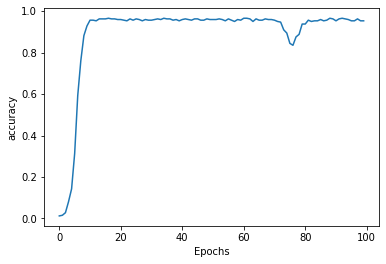

In [82]:
plot_graphs(history, 'accuracy')


In [86]:
seed_text = "وَاحَرّ قَلْباهُ"
#seed_text = "رجعونی عنیک"
next_words = 5
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
	predict_x=model.predict(token_list)
	predicted=np.argmax(predict_x,axis=1)

	#predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

وَاحَرّ قَلْباهُ ممّنْ قَلْبُهُ شَبِمُ شَبِمُ قَلْبُهُ


# Note:
if the number of next_words is increased, the predicted output will output repeated words, maybe to solve this a larger dataset is required.